#The Big Cat Classifier

1. Cheetah 
1. Cougar 
1. Jaguar 
1. Leopard 
1. Lion
1. Snow leopard 
1. Tiger 

I have always had a problem in recognizing big cats especially to differentiate cheetah's, leopard's, tigers. 
I was learning the FastAI v2 by reading the book and wondered why not build a classifier for this end-to-end, deploy this and see how the model performs.

The tiger and lion are comparitively easier to identify but lets see how the model performs and hopefully help me in recognizing these Big Cats better.

In [1]:
import fastbook
fastbook.setup_book()

In [2]:
#import the widgets for analysis
from fastbook import *
from fastai.vision.widgets import *

Preparing the dataset :
I will be using Bing Image Search API for downloading and preparing the dataset. I had issues obtaining an API key from Bing search engine page, so will be using the following package to download images.
Ref : https://pypi.org/project/bing-image-downloader/
It is *Python library to download bulk of images from Bing.com.*

In [3]:
# Installing the package
! pip install bing-image-downloader

In [4]:
# Import the downloader
from bing_image_downloader import downloader

To start off, let us get about 100 images per category and see how the model performs.

In [5]:
search_strings = ['cheetah', 'cougar cat', 'jaguar cat', 'leopard', 'lion', 'snow leopard', 'tiger']

In [6]:
path = Path('big_cats')
if not path.exists():
    path.mkdir()

for query_string in search_strings:
    downloader.download(query_string, limit=100,  output_dir='big_cats', adult_filter_off=True, force_replace=True, timeout=60)

In [7]:
! ls big_cats/

cheetah  cougar cat  jaguar cat  leopard  lion	snow leopard  tiger


I ended up getting a lot of porn images with the search query "Cougar", apparently it is informaly also used for *an older woman seeking a sexual relationship with a younger man.*  This was something I didn't know, thus it is always good practise to sample through your dataset when you scrap data from the internet. :P

Just as I used "jaguar cat" to avoid getting images of the jaguar car, I'll have to redo the same for cougar. :P

Let us go through some of the images in our dataset.

In [8]:
fns = get_image_files(path)
fns

(#700) [Path('big_cats/cheetah/Image_1.jpg'),Path('big_cats/cheetah/Image_10.jpg'),Path('big_cats/cheetah/Image_100.jpg'),Path('big_cats/cheetah/Image_11.jpg'),Path('big_cats/cheetah/Image_12.jpg'),Path('big_cats/cheetah/Image_13.jpg'),Path('big_cats/cheetah/Image_14.jpg'),Path('big_cats/cheetah/Image_15.jpg'),Path('big_cats/cheetah/Image_16.jpg'),Path('big_cats/cheetah/Image_17.jpg')...]

In [9]:
# Check to see if there are any corrupted or failed images.
failed = verify_images(fns)
failed

(#0) []

Creating the DataLoaders from the Data with FastAI.

We have validation set of 20% to test the performance of our dataset and a seed_value is set to make sure the results are reproducible by ensuring the split is same each time.

In [10]:
big_cats = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(224))

In [11]:
dls = big_cats.dataloaders(path)

In [12]:
dls.train.show_batch??

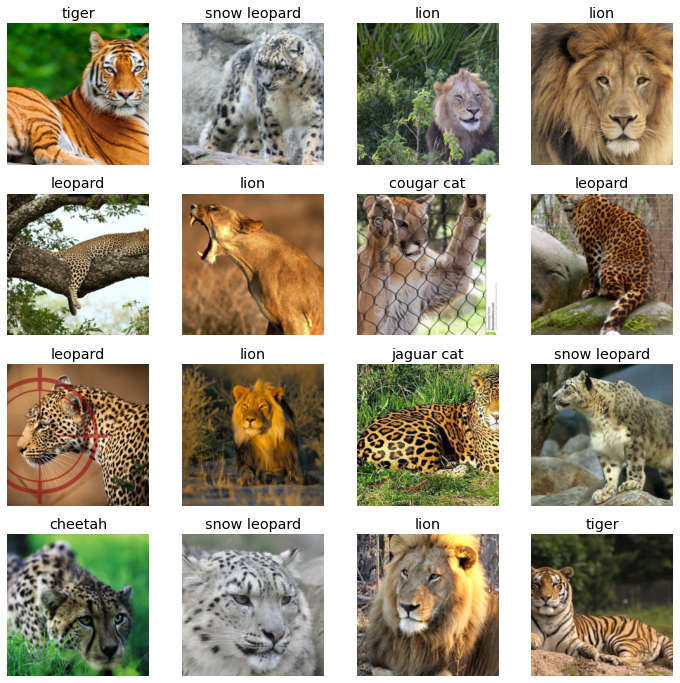

In [13]:
dls.train.show_batch(max_n=16, nrows = 4)

## Dataset Preprocessing

Trying out some data augmentation techniques to increase and improve the model training capabilities.

aug_transforms performs all standard data augmentation techniques for images such as rotations, flips, perspective wraping, brightness and constrast changes.   
Perspective wraping is way of changing the perspective or angle in which you view the image. For example, make your images look like wide-angle shots, straightened view of your image and so on.
These methods have proven to work well and replicate what you would likely see in the wild/production.

In [14]:
big_cats = big_cats.new(
            item_tfms=RandomResizedCrop(224, min_scale = 0.5),
            batch_tfms=aug_transforms())

In [15]:
dls = big_cats.dataloaders(path)

In [20]:
dls.train.show_batch??

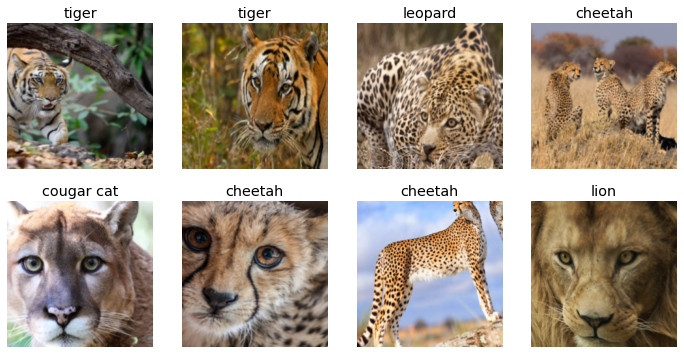

In [21]:
# Let us see some of the transformed data.
# Unique = True shows all the augmented data for one image.
dls.train.show_batch(max_n=8, nrows=2, unique=False)

## Training the model
We will be using ResNet18 model pretrained on the ImageNet dataset.  
Resnet18 refers to the ResNet architecture for image classification containing 18 layers in total. There are other variants of this architecture such as Resnet50, Resnet100 and so on.
For this example, we will split to the Resnet18 architecture and see how things work.

In [23]:
cnn_learner??

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [32]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.286892,0.424569,0.157143,00:11


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.704982,0.319138,0.142857,00:10
1,0.539837,0.269483,0.114286,00:10
2,0.442854,0.256074,0.071429,00:10
3,0.375341,0.276355,0.092857,00:11


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: U

### Results Interpretation

Let's analyse the results on the validation set by using a confusion matrix.

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

Lets see what all interpretation methods are available :
- plot_confusion_matrix
- print_classification_report
- most_confused

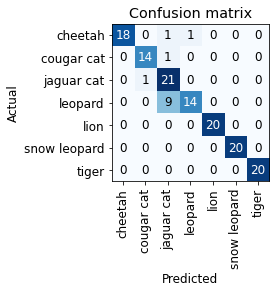

In [36]:
interp.plot_confusion_matrix()

In [37]:
interp.print_classification_report()

              precision    recall  f1-score   support

     cheetah       1.00      0.90      0.95        20
  cougar cat       0.93      0.93      0.93        15
  jaguar cat       0.66      0.95      0.78        22
     leopard       0.93      0.61      0.74        23
        lion       1.00      1.00      1.00        20
snow leopard       1.00      1.00      1.00        20
       tiger       1.00      1.00      1.00        20

    accuracy                           0.91       140
   macro avg       0.93      0.91      0.91       140
weighted avg       0.93      0.91      0.91       140



The classification report gives us per class precision and recall followed by the overall precision.  
We have an overall accuracy of 91%. The best categories being lion, tiger, snow leopard and cheetah.
The following classes have issues :
- Jaguar cat has a high recall but lower precision. This means that most jaguar cats are being classified correctly as Jaguar, but other cats are also being guessed as jaguar. We can see from the confusion matrix that 9 leopards have been guessed as jaguars, and thus the precision of jaguars is lower.
- Similarly, leopards have high precision but lower recall which means that other classes are not being guessed as leopards but not all leopards have been guessed correctly.

In [38]:
interp.most_confused()

[('leopard', 'jaguar cat', 9),
 ('cheetah', 'jaguar cat', 1),
 ('cheetah', 'leopard', 1),
 ('cougar cat', 'jaguar cat', 1),
 ('jaguar cat', 'cougar cat', 1)]

In [39]:
interp.most_confused??

All the above 3 interpretations are good for analysing where our model is going wrong.   
The most confused method basically shows the *Sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.*"

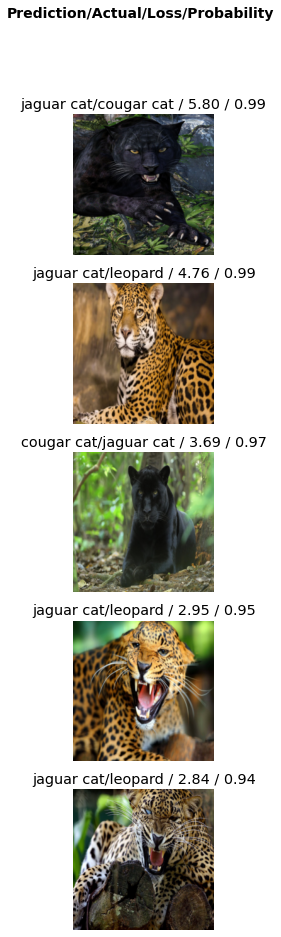

In [46]:
interp.plot_top_losses(5, nrows = 5)

### Dataset Cleaning with the Trained Model

Lets see if we can use the ImageClassifierCleaner which FastAI provides to see if we can find anomolies in the dataset.

In [47]:
#hide
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Learnings from the analysing the images is that cougar and jaguar cat have images of black cats and these may require a separate category called "black panthers" to improve the classification results. But I'll leave this as part of further improvements. 

### Exporting  the Model and Deployment

The export method saves the following data :
1. architecture + trainable parameters -> model
1. stores the definition of how you create your DataLoaders. The validation DataLoader is saved by default, which will be used during the inference process. 

Second point is really helpful as you would not need to redefine your dataloader during the inference process.

In [50]:
learn.export(fname = "big_cat_classifier.pkl")

In [51]:
path = Path()
path.ls(file_exts='.pkl')


(#2) [Path('export.pkl'),Path('big_cat_classifier.pkl')]

Head over to the model inference notebook for deployment setup.